In [1]:
#%matplotlib inline
import numpy as np
import pandas as pd
import scipy.sparse
from sklearn import preprocessing
from sklearn.grid_search import ParameterGrid
import xgboost as xgb
import pickle
#import graphviz
import matplotlib.pyplot as plt
%matplotlib inline

Read in just the testing and training data.

In [30]:
error = pd.read_pickle('scripts/cv_results/actions_e20/search3/res1.p')
error2 = pd.read_pickle('scripts/cv_results/actions_e20/search3/res5.p')
error6 = pd.read_pickle('scripts/cv_results/actions_e20/search3/res6.p')
e = pd.read_pickle('scripts/cv_results/actions_e20/errors_search3.p')
param = pd.read_pickle('scripts/cv_results/actions_e20/params_search3.p')
#error['mean'] = error.apply(np.mean, axis = 1)
# error = error.astype(np.float64)
# error['mean'] = error.mean(1)
# error['std'] = error.std(1)

In [108]:
param

,subsample,eta,colsample_bytree,max_depth,details
0,0.7,0.16,0.30,6,actions2
1,0.7,0.16,0.60,6,actions2
2,0.7,0.16,0.60,6,actions3_nodrop
3,0.7,0.16,0.60,6,actions3_dropped_p4total
4,0.9,0.13,0.45,6,actions3_nodrop
5,0.9,0.13,0.60,6,actions3_nodrop
6,0.9,0.13,0.45,6,"actions3_nodrop, ndcg_all"
7,0.9,0.13,0.45,6,"actions3_nodrop, sklearn_kfold"
8,0.9,0.13,0.45,6,"nodrop, sklearn_kfold, foreign"
9,0.9,0.13,0.45,6,"nodrop, sklearn_kfold, usNdf"


In [109]:
e.loc[90:,e.columns.str.contains('valid.*mean')].iloc[:,-4:]

,valid_mean8,valid_mean9,valid_mean10,valid_mean11
90,0.144073,0.073770,0.143850,0.143830
91,0.144182,0.073788,0.143837,0.143835
92,0.144153,0.073767,0.143825,0.143872
93,0.144147,0.073838,0.143802,0.143867
94,0.144048,0.073812,0.143768,0.143880
95,0.144070,0.073722,0.143757,0.143933
96,0.144117,0.073632,0.143790,0.143855
97,0.144190,0.073672,0.143850,0.143883
98,0.144085,0.073688,0.143858,0.143808
99,0.144092,0.073707,0.143827,0.143792


In [57]:
param.loc[11,'details'] ='nodrop, sklearn_kfold, foreign'

In [93]:
x_10 = e.loc[70:,e.columns.str.contains('valid.*mean')].iloc[:,-2]
x_11 = e.loc[70:,e.columns.str.contains('valid.*mean')].iloc[:,-1]

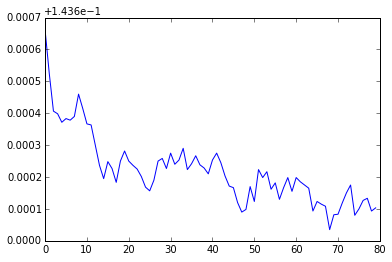

In [94]:
plt.plot(np.arange(len(x_10)), x_10)

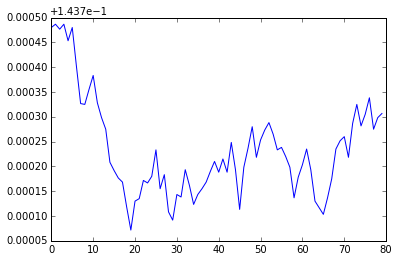

In [95]:
plt.plot(np.arange(len(x_11)), x_11)

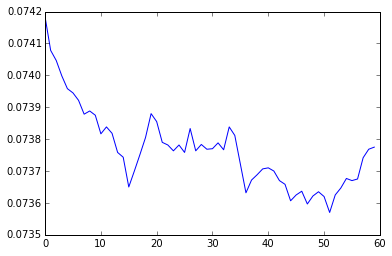

In [22]:
plt.plot(np.arange(len(x_for)), x_us)

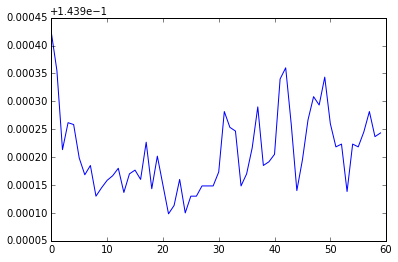

In [13]:
plt.plot(np.arange(len(x_for)), x_for)

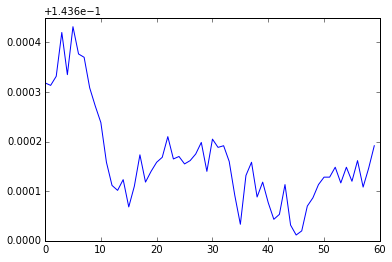

In [18]:
plt.plot(np.arange(len(x_all)), x_all)

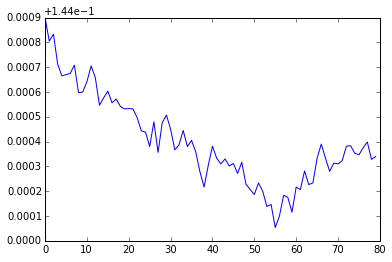

In [67]:
plt.plot(np.arange(len(x1)), x1)

In [3]:
#train_100 = pd.read_csv('Airbnb_data/train_users_2.csv', nrows = 100, index_col='id')
train_data = pd.read_csv('data/train_users_2.csv', index_col = 'id')
test_data = pd.read_csv('data/test_users.csv', index_col = 'id')
#sessions = pd.read_csv('../data/sessions.csv')
#age = pd.read_csv('Airbnb_data/age_gender_bkts.csv')
#countries = pd.read_csv('Airbnb_data/countries.csv')
all_df = pd.read_pickle('data/all_df.p')

In [5]:
error = pd.read_pickle('scripts/cv_results.p')
params = pd.read_pickle('scripts/cv_params.p')

In [6]:
res = pd.concat([error, params], axis = 1)

In [7]:
res.sort_values(by = 'test-error-mean', axis = 0);

In [6]:
with open('xgbmodels/sessions_e20_25n.p', 'rb') as f:
    bst = pickle.load(f)
features = sorted(bst.get_fscore().items(), key = lambda x: x[1], reverse = True)
[(feat, all_df.columns[int(feat[1:])], score) for feat, score in features]

NameError: name 'all_df' is not defined

In [ ]:
xgb.to_graphviz(bst, num_trees=11)

In [ ]:
submission = pd.DataFrame(np.column_stack([idx, cntr]), columns = ['id', 'country'])
submission.to_csv('submissions/datebin_model.csv', index=False)